# Homework 3 Part 2

**Due: Monday, October 16, 11:59 PM**

This is an individual assignment.

## Description

Create or edit this Jupyter Notebook to answer the questions below. Use simulations to answer these questions. An analytical solution can be useful to check if your simulation is correct but analytical solutions alone will not be accepted as a solution to a problem.

In [1]:
import scipy.stats as stats
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Problem 3

**Suppose you have an assortment of coins: 51 coins each with probability of flipping heads $p$, in the interval $[0.3,0.8]$, defined below:**

In [2]:
import numpy as np
allcoins = np.linspace(0.3,0.8,51)  # set of coins

allcoins

array([0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
       0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51,
       0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62,
       0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73,
       0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 ])

**Consider the experiment where you pick a coin at random and flip it 8 times, and the event "all tails" occurs. **

1. **What is the probability that the coin is fair?**

2. **To answer this question, use a Bayesian hypothesis test to compute the 99\% CI that contains the set of prior probabilities $p$ for the outcome "8 tails in 8 flips".**

The proability of flipping 8 tails in 8 flips is given by the binomial distribution: $P(C_i | H_8)$ or $P(C_i) P(H | C_i)$

In [ ]:
P_C_i = 1 / 51

## Problem 4

Use simulations in Jupyter/Python to answer these questions. You may submit your answers in one or more PDF files of your Jupyter notebooks.

In [4]:
# Fancy progress bar:
# (If this throws an error, then remove this import line and 
# change trange to range below).
#
# Note that if you interrupt a block from running, the progress
# bar output will get all messed up. Just save and exit your notebook
# and reload it to resume with normal progress bar operation

from tqdm import trange

In Problem 3, we conduct a Bayesian hypothesis test and generate confidence intervals using Bayesian updates.

However, the way we drew random values from the *a priori* distribution was pretty awkward because we had not yet introduced random variables.

In this problem, you will use random variables to conduct Bayesian statistical tests, but with a variety of *a priori* distributions.

Let's begin by redoing the experiment using a uniform random variable (instead of quantizing the interval $[0.3,0.8]$ and randomly choosing one of the quantized values.

First, we create our uniform random variable and plot its density function:

In [5]:
U=stats.uniform()

Now, let's create a new form of the ```exactcoins()``` function that takes as input a random variable and draws the value of ```prob_heads``` from that random variable:

1. Finish this function by editing the indicated line to draw a single random variable from $X$:

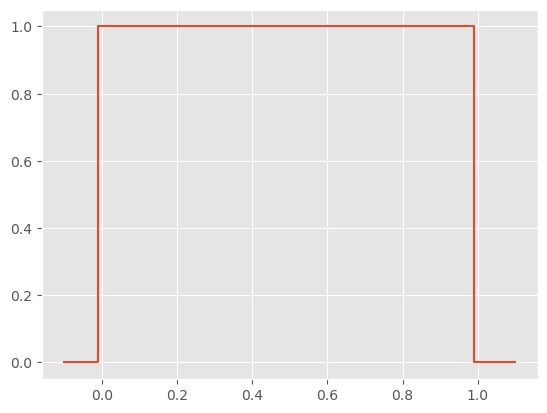

In [6]:
u=np.linspace(-0.1,1.1,121)
plt.step(u,U.pdf(u));

In [8]:
# for some of the simulations 

def exactcoins(X, flips=8, target=-1, num_sims=50000, returnvals=False):
    '''
    Biased coin flip simulation, where the probability of heads is drawn from a 
    provided random variable X

    Coin is flipped a specified number of times, and all events that match the
    target number of heads are recorded. A histogram of the distribution is
    also plotted.

    Note: In this version, if there are < 25 unique values of the probability
    of heads that achieve the target number of flips, then X will be treated as
    discrete and the histogram will be normalized as a PMF. Otherwise, X will
    be treated as continuous and the histogram will be normalized as a PDF. 
    '''    
    if target==-1:
        target=flips
    
    events=[]
    for sim in trange(num_sims):
        
        prob_heads = npr.choice(allcoins)        
        R=npr.uniform(size=flips)
        num_heads=np.sum(R<prob_heads)
        if num_heads==target:
            events+=[prob_heads]
            
    vals,counts=np.unique(events,return_counts=True)
    if len(vals)<25:
        plt.bar(vals,counts/len(events),width=0.01)
        plt.xlim(0,1)
    else:
        plt.hist(events,bins=min(len(np.unique(events)),25),density=True)
    if returnvals:
        return events

2. Run ```exactcoins()``` with input random variable that is uniform on $[0,1)$ for 8 flips and 8 heads observed. Show the plot of the output distribution. (Check with the graph from Lecture 7.)

100%|██████████| 50000/50000 [00:01<00:00, 25239.12it/s]


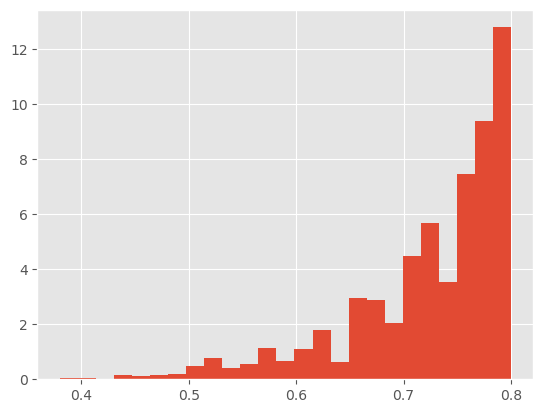

In [10]:
exactcoins(U,8,8,50000);

3. Run ```exactcoins()``` with input random variable that is uniform on $[0,1)$ for 8 flips and 1 head observed. Show the plot of the output distribution. (Check with the graph from Lecture 7.)

Now let's learn how to generate a random variable with an arbitrary density function. 

Python is an object-oriented (OO) programming language, and all continuous random variables in ```scipy.stats``` are *subclasses* of the ```stats.rv_continuous``` class.

If you don't know OO programming, that is okay. 

Basically, what this means for us is that we can create a new type of random variable by starting with the ```stats.rv_continuous``` class and then specifying just enough information to specify the new random variable. We will get all the usual methods associated with ```scipy.stats``` random variables without having to implement them all.

To do this, we create a *subclass* of ```stats.rv_continuous``` and define a *method* ```_pdf()``` that implements the pdf for the new random variable.

Let's implement a random variable that is linear from $a$ to $b$. The pdf will be 

\begin{align*}
f_X(x) = \begin{cases} \frac{2}{(b-a)^2} (x-a), & a \le x < b\\ 0, & \mbox{otherwise} \end{cases}
\end{align*}

Here is the code to do that:

In [ ]:
class linear (stats.rv_continuous):
    def _pdf(self,x):
        return 2/(self.b-self.a)**2*(x-self.a)

In [ ]:
X = linear(a=0, b=1)

In [ ]:
x=np.linspace(-0.4,1.4,101)

In [ ]:
plt.plot(x,X.pdf(x));

Note that once we create the random variable in this way, we can call all the usual ```scipy.stats``` methods for continuous random variables:

In [ ]:
plt.plot(x,X.cdf(x));

In [ ]:
X.mean()

In [ ]:
X.var()

In [ ]:
X.rvs(size=10)

4. Run ```exactcoins()``` with input random variable $X$ for 8 flips and 8 heads observed. Show the plot of the output distribution. Comment on the *a posterior* density compared to that for the uniform input distribution.

5. Run ```exactcoins()``` with input random variable $X$ for 8 flips and 1 head observed. Show the plot of the output distribution. Comment on  the *a posterior* density compared to that for the uniform input distribution.

6. Now create a new random variable class with a quadratic density on $[0,1]$. Let the quadratic density be 0 when the input to the density function is 1 and takes its maximum value when the input to the density function is 0

(Be sure to figure out the right scaling of the quadratic so the pdf is a valid pdf, that is, it integrates to 1.)

Plot the pdf and cdf for your random variable. Check that the cdf is 1 when its argument is 1. Also, show the mean and variance for your random variable.

7. Run ```exactcoins()``` with this new input random variable for 8 flips and 8 heads observed. Use ```returnvals=True``` and store the output in a variable. Show the plot of the output distribution. 

8. Use the returned values from part 7) to generate a 99% credible interval. Based on your result, should we reject the possibility that it is fair coin?

9. Run ```exactcoins()``` with this new input random variable for 8 flips and 1 head observed. Use ```returnvals=True``` and store the output in a variable. Show the plot of the output distribution. 

10. Use the returned values from part 9) to generate a 99% credible interval. Based on your result, should we reject the possibility that it is fair coin?

# Submission Instructions:

When you are done with the exercises in this notebook, upload a PDF or your results to Canvas.  To create the PDF with your code and results, you can use the following procedure:

1. Go to Kernel
2. Click Restart and Run All
3. Check over the notebook to make sure everything still looks right

**At this point, you may be able to just choose "Print" from JupyterLab's File menu and then print to PDF (OS dependent). If everything is correct in the PDF version, then upload that PDF to the assignment in Canvas.**

**If your PDF is missing any of your outputs, you can use the following procedure:**

4. Next, click File at the top on the tool bar below Jupyter icon
5. Click Save and Export Notebook as... and choose HTML
6. The HTML file will either open in a new tab/window or be downloaded to your Downloads folder. Open it if it is in the Downloads folder
7. Print the HTML file to PDF (how to do this is OS dependent). Make sure to save it to somewhere you can find it
8. Open the PDF to make sure that everything looks right and that nothing is cut off
9. Upload both the PDF and ipynb files to the Canvas assignment